<a href="https://colab.research.google.com/github/Ifra96/BDP-cont./blob/main/BDP_China.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas==1.3.1

     |████████████████████████████████| 11.5 MB 3.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.1 which is incompatible.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import pandas as pd
import numpy as np
import re
import pandas as pd
#needed for text processing and analytics
import nltk
import nltk.stem

from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer
from nltk import pos_tag, sent_tokenize, word_tokenize, BigramAssocMeasures,\
    BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
from nltk.corpus import stopwords
from string import punctuation

#visualization
from plotly import tools
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


#to plot inside the document
%matplotlib inline
import matplotlib.pyplot as plt

# Any results you write to the current directory are saved as output.

Upload Speech as .txt file and any image you want the word cloud to be,

In [ ]:
from google.colab import files #import statements of leaders at txt files
uploaded = files.upload()

Saving Chinese-Pres-address-.txt to Chinese-Pres-address- (1).txt


In [ ]:
f = open("Chinese-Pres-address-.txt", "r") #read
print(f.read())

Mr.President,
Colleagues,
This year marks the 75th anniversary of the victory in the World Anti-Fascist War and the founding of the United Nations (UN). Yesterday, the high-level meeting to commemorate the 75th anniversary of the UN was held. The meeting was a significant one, as it reaffirmed our abiding commitment to the purposes and principles of the UN Charter on the basis of reviewing the historical experience and lessons of the World Anti-Fascist War.
Mr. President,
We humans are battling COVID-19, a virus that has ravaged the world and has kept resurging. In this fight, we have witnessed the efforts of governments, dedication of medical workers, exploration of scientists, and perseverance of the public. People of different countries have come together. With courage, resolve and compassion which lit the dark hour, we have confronted the disaster head on. The virus will be defeated. Humanity will win this battle!
- Facing the virus, we should put people and life first. We should m

In [ ]:
import pandas as pd
df = pd.read_csv("Chinese-Pres-address-.txt",delimiter="\t",header=None,names=["text"])

In [ ]:
df

,text
0,"Mr.President,"
1,"Colleagues,"
2,This year marks the 75th anniversary of the vi...
3,"Mr. President,"
4,"We humans are battling COVID-19, a virus that ..."
5,"- Facing the virus, we should put people and l..."
6,"- Facing the virus, we should enhance solidari..."
7,"- Facing the virus, we should adopt comprehens..."
8,"- Facing the virus, we should show concern for..."
9,"Seventy-five years ago, China made historic co..."


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
df['text'] = df['text'].str.lower().map(lambda x: re.sub('\W+',' ', x))
df['text'] = df['text'].str.lower().map(lambda x: re.sub('united nations','united_nations', x))
df['token'] = df['text'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
#I noticed that "'s" is not included in stopwords, while I think it doesn't bring much meaning in a text, so I'll add it to the set to remove from the cleaned tokens.
stop_words.add("'s")
stop_words.add("'")
stop_words.add("-")
stop_words.add("'")
df['clean'] = df['token'].apply(lambda x: [w for w in x if not w in stop_words and not w in punctuation])


In [ ]:
df

,text,token,clean
0,mr president,"[mr, president]","[mr, president]"
1,colleagues,[colleagues],[colleagues]
2,this year marks the 75th anniversary of the vi...,"[this, year, marks, the, 75th, anniversary, of...","[year, marks, 75th, anniversary, victory, worl..."
3,mr president,"[mr, president]","[mr, president]"
4,we humans are battling covid 19 a virus that h...,"[we, humans, are, battling, covid, 19, a, viru...","[humans, battling, covid, 19, virus, ravaged, ..."
5,facing the virus we should put people and lif...,"[facing, the, virus, we, should, put, people, ...","[facing, virus, put, people, life, first, mobi..."
6,facing the virus we should enhance solidarity...,"[facing, the, virus, we, should, enhance, soli...","[facing, virus, enhance, solidarity, get, toge..."
7,facing the virus we should adopt comprehensiv...,"[facing, the, virus, we, should, adopt, compre...","[facing, virus, adopt, comprehensive, long, te..."
8,facing the virus we should show concern for a...,"[facing, the, virus, we, should, show, concern...","[facing, virus, show, concern, accommodate, ne..."
9,seventy five years ago china made historic con...,"[seventy, five, years, ago, china, made, histo...","[seventy, five, years, ago, china, made, histo..."


In [ ]:
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

stemmer = nltk.stem.PorterStemmer()
df['stems'] = [[format(get_lemma(token)) for token in speech] for speech in df['clean']]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df

,text,token,clean,stems
0,mr president,"[mr, president]","[mr, president]","[mr, president]"
1,colleagues,[colleagues],[colleagues],[colleague]
2,this year marks the 75th anniversary of the vi...,"[this, year, marks, the, 75th, anniversary, of...","[year, marks, 75th, anniversary, victory, worl...","[year, marks, 75th, anniversary, victory, worl..."
3,mr president,"[mr, president]","[mr, president]","[mr, president]"
4,we humans are battling covid 19 a virus that h...,"[we, humans, are, battling, covid, 19, a, viru...","[humans, battling, covid, 19, virus, ravaged, ...","[humans, battle, covid, 19, virus, ravage, wor..."
5,facing the virus we should put people and lif...,"[facing, the, virus, we, should, put, people, ...","[facing, virus, put, people, life, first, mobi...","[facing, virus, put, people, life, first, mobi..."
6,facing the virus we should enhance solidarity...,"[facing, the, virus, we, should, enhance, soli...","[facing, virus, enhance, solidarity, get, toge...","[facing, virus, enhance, solidarity, get, toge..."
7,facing the virus we should adopt comprehensiv...,"[facing, the, virus, we, should, adopt, compre...","[facing, virus, adopt, comprehensive, long, te...","[facing, virus, adopt, comprehensive, long, te..."
8,facing the virus we should show concern for a...,"[facing, the, virus, we, should, show, concern...","[facing, virus, show, concern, accommodate, ne...","[facing, virus, show, concern, accommodate, ne..."
9,seventy five years ago china made historic con...,"[seventy, five, years, ago, china, made, histo...","[seventy, five, years, ago, china, made, histo...","[seventy, five, years, ago, china, make, histo..."


In [ ]:
def plot_wordcloud(words, mask=None, max_words=400, max_font_size=120, figure_size=(18.0,14.0), #wordcloud
                   title = None, title_size=40, image_color=False):
    stopwords = nltk.corpus.stopwords.words('english')
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    wordcloud = WordCloud(stopwords=STOPWORDS,collocations=False, width= 3000, height = 2000, background_color='salmon', colormap='Pastel1', mask = mask).generate(" ".join(words_except_stop_dist))
  
    plt.figure(figsize=figure_size)
    
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'indigo', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
import matplotlib.pyplot as plt##


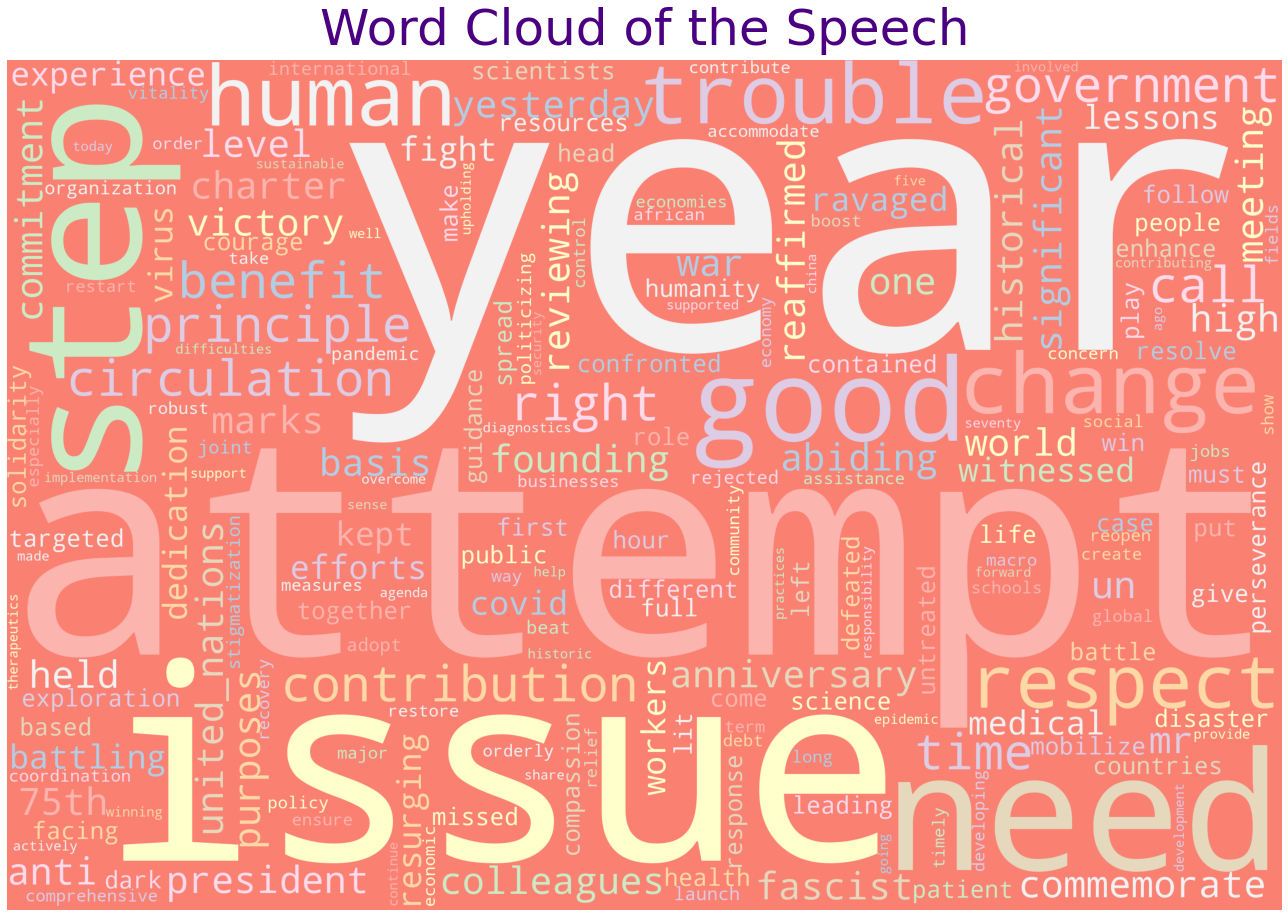

In [ ]:
from wordcloud import WordCloud, STOPWORDS

words = []
for i,row in df.iterrows():
  word = row['clean']
  for each in word :
    words.append(each)
words = nltk.FreqDist(words)
plot_wordcloud(words, max_words=400, max_font_size=120,title = 'Word Cloud of the Speech', title_size=50)
plt.savefig('plot_wordcloud', dpi = 300, bbox_inches = 'tight')



In [ ]:
text_data = list(df['clean'])

In [ ]:
from gensim import corpora #importing gensim for extracting topics
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(text_data)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in text_data]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

print(lda_model.print_topics())

[(0, '0.038*"china" + 0.037*"global" + 0.032*"countries" + 0.028*"development" + 0.020*"international" + 0.016*"19" + 0.016*"covid" + 0.015*"un" + 0.014*"us" + 0.013*"sustainable"'), (1, '0.010*"virus" + 0.009*"un" + 0.009*"world" + 0.007*"war" + 0.007*"fascist" + 0.007*"anti" + 0.007*"anniversary" + 0.007*"meeting" + 0.007*"75th" + 0.007*"economies"'), (2, '0.019*"development" + 0.013*"world" + 0.010*"shared" + 0.008*"others" + 0.008*"win" + 0.008*"us" + 0.008*"economic" + 0.008*"mr" + 0.008*"president" + 0.007*"pursue"'), (3, '0.013*"international" + 0.010*"together" + 0.009*"generation" + 0.009*"justice" + 0.009*"baton" + 0.009*"democracy" + 0.009*"equity" + 0.009*"freedom" + 0.009*"mankind" + 0.009*"values"')]


In [ ]:
import gensim # Print the Keyword in the 10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.020*"poverty" + 0.013*"economies" + 0.013*"economy" + 0.013*"restore" + 0.013*"control" + 0.013*"virus" + 0.013*"set" + 0.007*"global" + 0.007*"major" + 0.007*"economic"')
(1, '0.031*"development" + 0.024*"country" + 0.016*"economic" + 0.016*"china" + 0.016*"domestic" + 0.016*"seek" + 0.016*"war" + 0.008*"global" + 0.008*"recovery" + 0.008*"world"')
(2, '0.025*"make" + 0.017*"virus" + 0.017*"must" + 0.017*"people" + 0.017*"us" + 0.017*"shared" + 0.017*"choice" + 0.009*"first" + 0.009*"world" + 0.009*"facing"')
(3, '0.023*"colleagues" + 0.012*"world" + 0.012*"international" + 0.012*"must" + 0.012*"launch" + 0.012*"health" + 0.012*"response" + 0.012*"science" + 0.012*"play" + 0.012*"give"')
(4, '0.041*"president" + 0.041*"mr" + 0.033*"un" + 0.017*"china" + 0.017*"world" + 0.017*"war" + 0.017*"anniversary" + 0.017*"fascist" + 0.017*"75th" + 0.017*"anti"')
(5, '0.035*"china" + 0.024*"us" + 0.024*"provide" + 0.024*"million" + 0.024*"50" + 0.024*"south" + 0.012*"global" + 0.012*"covid

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=text_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=text_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.7499,"development, world, shared, others, win, us, e...","[mr, president]"
1,1,2.0,0.6245,"development, world, shared, others, win, us, e...",[colleagues]
2,2,1.0,0.9815,"virus, un, world, war, fascist, anti, annivers...","[year, marks, 75th, anniversary, victory, worl..."
3,3,2.0,0.7499,"development, world, shared, others, win, us, e...","[mr, president]"
4,4,1.0,0.9805,"virus, un, world, war, fascist, anti, annivers...","[humans, battling, covid, 19, virus, ravaged, ..."
5,5,0.0,0.9669,"china, global, countries, development, interna...","[facing, virus, put, people, life, first, mobi..."
6,6,3.0,0.9745,"international, together, generation, justice, ...","[facing, virus, enhance, solidarity, get, toge..."
7,7,1.0,0.9786,"virus, un, world, war, fascist, anti, annivers...","[facing, virus, adopt, comprehensive, long, te..."
8,8,0.0,0.9778,"china, global, countries, development, interna...","[facing, virus, show, concern, accommodate, ne..."
9,9,0.0,0.9936,"china, global, countries, development, interna...","[seventy, five, years, ago, china, made, histo..."


In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9936,"china, global, countries, development, international, 19, covid, un, us, sustainable","[seventy, five, years, ago, china, made, historic, contributions, winning, world, anti, fascist,..."
1,1.0,0.9815,"virus, un, world, war, fascist, anti, anniversary, meeting, 75th, economies","[year, marks, 75th, anniversary, victory, world, anti, fascist, war, founding, united_nations, u..."
2,2.0,0.9675,"development, world, shared, others, win, us, economic, mr, president, pursue","[first, covid, 19, reminds, us, living, interconnected, global, village, common, stake, countrie..."
3,3.0,0.9745,"international, together, generation, justice, baton, democracy, equity, freedom, mankind, values","[facing, virus, enhance, solidarity, get, together, follow, guidance, science, give, full, play,..."


In [ ]:
pip install pyLDAvis #using plydavis to interpret topics

In [ ]:
import pyLDAvis.gensim_models
lda10 = gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda_display10 = pyLDAvis.gensim_models.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display10)



/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning:

This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning:

This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning:

This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information

/usr/local/lib/python3.7/dist-packag

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import common_corpus

In [ ]:
coherence_model_lda = CoherenceModel(model=lda10, texts=text_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.5512135788867198


In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):
    ss = TextBlob(text).sentiment.polarity
    return ss

def analyze_subjectivity(text):
    ss = TextBlob(text).sentiment.subjectivity
    return ss

In [ ]:
df['polarity'] = np.array([ analyze_sentiment(text) for text in df['text'] ])
df['subjectivity'] = np.array([ analyze_subjectivity(text) for text in df['text'] ])
df.head()

,text,token,clean,stems,polarity,subjectivity
0,mr president,"[mr, president]","[mr, president]","[mr, president]",0.000000,0.000000
1,colleagues,[colleagues],[colleagues],[colleague],0.000000,0.000000
2,this year marks the 75th anniversary of the victory in the world anti fascist war and the foundi...,"[this, year, marks, the, 75th, anniversary, of, the, victory, in, the, world, anti, fascist, war...","[year, marks, 75th, anniversary, victory, world, anti, fascist, war, founding, united_nations, u...","[year, marks, 75th, anniversary, victory, world, anti, fascist, war, founding, united_nations, u...",0.178333,0.471667
3,mr president,"[mr, president]","[mr, president]","[mr, president]",0.000000,0.000000
4,we humans are battling covid 19 a virus that has ravaged the world and has kept resurging in thi...,"[we, humans, are, battling, covid, 19, a, virus, that, has, ravaged, the, world, and, has, kept,...","[humans, battling, covid, 19, virus, ravaged, world, kept, resurging, fight, witnessed, efforts,...","[humans, battle, covid, 19, virus, ravage, world, keep, resurge, fight, witness, effort, governm...",0.130000,0.293333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc898928790>]],
      dtype=object)

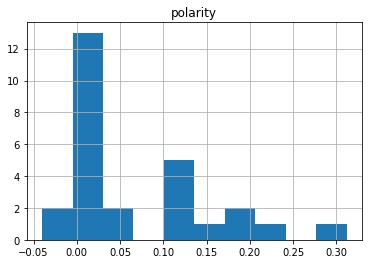

In [ ]:
df.hist(column='polarity')

In [ ]:
df["polarity"].mean()

0.06038615056158915

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc898977510>]],
      dtype=object)

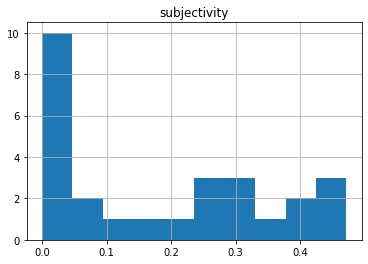

In [ ]:
df.hist(column='subjectivity')

In [ ]:
df["subjectivity"].mean()

0.1793270634912362

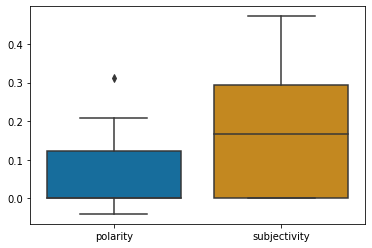

In [ ]:
import seaborn as sns
sns.boxplot(data = df,palette="colorblind")